<a href="https://colab.research.google.com/github/thiagodepaulo/nlp/blob/enap/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

- Um modelo define um conjunto de hipóteses, ou funções que computam predições a partir de suas entradas
- Regressão Linear -- o modelo consiste apenas de funções lineares
$$
 f_{w,b}(x) = \sum_j x_j w_j + b
$$
onde o conjunto de entrada são os pares $(x,y)$ e $w$ são os pesos e $b$ é o viés do modelo.

- Regressão Linear como operação matricial

$$
\begin{bmatrix}
\hat{y}_{1,1} & \hat{y}_{1,2} & \dots & \hat{y}_{1,c} \\
\hat{y}_{2,1} & \hat{y}_{2,2} & \dots & \hat{y}_{2,c} \\
\dots  & \dots  & \vdots & \dots \\
\hat{y}_{n,1} & \hat{y}_{n,2} & \dots & \hat{y}_{n,c}
\end{bmatrix} =
\begin{bmatrix}
x_{1,1} & x_{1,2} & \dots & x_{1,m} \\
x_{2,1} & x_{2,2} & \dots & x_{2,m} \\
\dots  & \dots  & \vdots & \dots \\
x_{n,1} & x_{n,2} & \dots & x_{n,m}
\end{bmatrix}
\times
\begin{bmatrix}
w_{1,1} & w_{1,2} & \dots & w_{1,c} \\
w_{2,1} & w_{2,2} & \dots & w_{2,c} \\
\dots  & \dots  & \vdots & \dots \\
w_{m,1} & w_{n,2} & \dots & w_{m,c}
\end{bmatrix}
+
\begin{bmatrix}
b1 \\
b2 \\
\vdots \\
b_n
\end{bmatrix}
$$


### Queremos os melhores valores de $w$ e $y$

- Função de perda -- MSE (Mean Squared Error)
$$
    MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


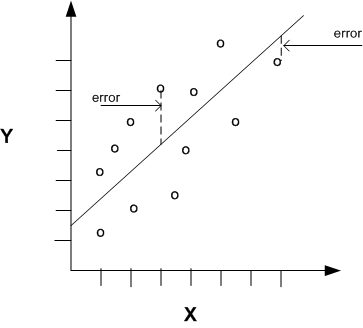

### Aplicando Gradiente

$$
\begin{align}
MSE(w,b) & = \frac{1}{n} \sum_{i=1}^n (y_i - (x_i w + b))^2 \\
\end{align}
$$

Derivando em relação a $w$

$$
\begin{align}
\frac{\partial MSE(w,d)}{\partial w} & = \frac{1}{n} \sum_{i=1}^n 2(y_i - (x_i w + b))(-x_i) \\
& = \frac{-2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i)
\end{align}
$$

Derivando em relação a b

$$
\begin{align}
\frac{\partial MSE(w,d)}{\partial b} & = \frac{-2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
\end{align}
$$

### Logistic Regression

- predição
$$
 f_{w,b}(x) = \sum_j x_j w_j + b
$$

- função Sigmoid
$$
\hat{y} = \frac{1}{1+e^{f_{w,b}(x)}}
$$

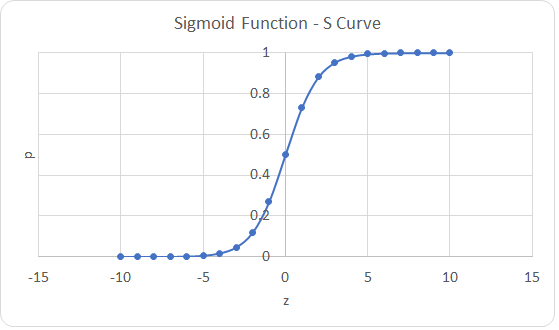

- Loss
$$
LOSS(w,d) = \frac{-1}{n} \sum_{i=1}^n y_i \log{(\hat{y}_i) + (1-y_i) log(1-\hat{y}_i)}
$$

Derivando em relação a $w$

$$
\begin{align}
\frac{\partial LOSS(w,d)}{\partial w} & = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)x_i
\end{align}
$$

Derivando em relação a b

$$
\begin{align}
\frac{\partial LOSS(w,b)}{\partial b} & = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
\end{align}
$$

### Equação de Atualização dos pesos

Depois de encontrar os gradientes, usaremos as seguintes equações para atualizar os pesos e o viés:

- atualizando os pesos
$$
w = w - \sigma \times \frac{\partial LOSS}{\partial w}
$$

- atualizando o viés
$$
w = w - \sigma \times \frac{\partial LOSS}{\partial b}
$$
onde $\sigma$ é a taxa de aprendizado.

In [1]:
import numpy as np
from tqdm.notebook import tqdm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, yhat):
        return 1/(1+np.exp(-yhat))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        _, n_classes = y.shape
        self.n_classes = n_classes
        self.weights = np.random.rand(n_classes,n_features)
        self.bias = np.zeros((n_classes,1))

        for _ in tqdm(range(self.n_iterations)):
            for c in range(n_classes):
                yhat = np.matmul(self.weights[c], X.T) + self.bias[c]
                yhat = self.sigmoid(yhat)

                dw = (np.reshape((yhat - y[:,c]),(X.shape[0],1)) * X).mean(axis=0)
                db = (yhat - y[:,c]).mean(axis=0)

                self.weights[c] = self.weights[c] - self.learning_rate * dw
                self.bias[c] = self.bias[c] - self.learning_rate * db



    def binary_cross_entropy_loss(self, y_true, y_pred):
        # Avoid division by zero
        y_pred = np.maximum(y_pred, 1e-15)
        # Calculate binary cross entropy loss
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def predict(self, X):
        yhat = []
        for c in range(self.n_classes):
            z = np.matmul(self.weights[c], X.T) + self.bias[c]
            z = self.sigmoid(z)
            yhat.append(z)
        y_pred = np.argmax(yhat,axis = 0)
        return y_pred


In [3]:
categories = ['talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = CountVectorizer(max_features=5000)
vectors = vectorizer.fit_transform(newsgroups_train.data)
X = vectors.toarray()
X = X.astype(float)

y_train = newsgroups_train.target
n_classes = len(set(y_train))
y_train = np.eye(n_classes)[y_train]

X_test = vectorizer.transform(newsgroups_test.data)
X_test = X_test.toarray()
X_test = X_test.astype(float)
y_test = newsgroups_test.target

In [5]:
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

  0%|          | 0/1000 [00:00<?, ?it/s]

<ipython-input-2-02ba77aafab3>:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-yhat))


In [6]:
print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       389
           1       0.82      0.86      0.84       394
           2       0.83      0.72      0.77       251

    accuracy                           0.83      1034
   macro avg       0.83      0.81      0.82      1034
weighted avg       0.83      0.83      0.83      1034

[[338  38  13]
 [ 33 338  23]
 [ 34  37 180]]
